In [292]:
import numpy as np  # as always import the nesscary packages / libraries. 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pandasgui import show
from scipy.stats import f_oneway
from scipy.stats import kruskal
import scikit_posthocs as sp
from scipy.stats import mannwhitneyu


In [121]:
class DataTransform: # use the DataTransfrom class change to the right dtypes form the .csv df. 
    def __init__(self, df):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.df = df

    def change_dtypes(self, dtype_dict):
        try:
            for column, dtype in dtype_dict.items():
                if column in self.df.columns:
                    if dtype == "datetime64":
                        self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
                    elif dtype == "boolean":
                        self.df[column] = self.df[column].map({'y': True, 'n': False})
                    else:
                        self.df[column] = self.df[column].astype(dtype, errors='ignore')
                else:
                    raise KeyError(f"Column '{column}' not found in DataFrame.")
            return self.df
        except Exception as e:
            raise RuntimeError(f"Error whilst changing datatypes: {e}")

if __name__ == "__main__":
    df_og = pd.read_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df7_4analysis.csv")

    transformer = DataTransform(df_og)

    dtype_dict = {
        "id": "int64",
        "member_id": "int64",
        "loan_amount": "float64",
        "term": "category",
        "int_rate": "float64",
        "grade": "category",
        "sub_grade": "category",
        "employment_length": "category",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "issue_date": "datetime64",
        "loan_status": "category",
        "payment_plan": "bool",
        "purpose": "category",
        "dti": "float64",
        "delinq_2yrs": "int64",
        "earliest_credit_line": "datetime64",
        "inq_last_6mths": "int64",
        "open_accounts": "int64",
        "total_accounts": "int64",
        "out_prncp": "float64",
        "total_payment": "float64",
        "total_rec_int": "float64",
        "total_rec_late_fee": "float64",
        "recoveries": "float64",
        "collection_recovery_fee": "float64",
        "last_payment_date": "datetime64",
        "last_payment_amount": "float64",
        "last_credit_pull_date": "datetime64",
        "collections_12_mths_ex_med": "category",
        "policy_code": "int64",
        "application_type": "category"
    }

    df_fin_x = transformer.change_dtypes(dtype_dict)

df_fin = df_fin_x.drop(columns=["Unnamed: 0"])

print(df_fin)

             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      13297208   15339420       8950.0         8950.0             8950.0   
1      10234817   12096968      11200.0        11200.0            11200.0   
2      10234813   12096964       8400.0         8400.0             8400.0   
3      10234796   12096947       9600.0         9600.0             9600.0   
4      10234755   12096906      15000.0        12000.0            15000.0   
...         ...        ...          ...            ...                ...   
20493    121673     121283       4500.0         4500.0             3000.0   
20494    120215     118760       4000.0         4000.0             3575.0   
20495    112245     112227       5000.0         5000.0             3975.0   
20496    111227     111223      20000.0        20000.0             2800.0   
20497     88046      88023       4400.0         4400.0             1400.0   

            term   int_rate  instalment grade sub_grade  ... total_rec_int 

In [267]:
class Plotter:
    def __init__(self, dataframe, default_palette="viridis"):
        self.dataframe = dataframe
        self.color_palette = sns.color_palette(default_palette)
        sns.set_style("whitegrid")

    def jointplotkde(self, x, y, kind="kde", hue=None, height=6, cmap="viridis", legend_fontsize=10):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, cmap=cmap, hue=hue, fill=True, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def pairplot(self, hue=None, palette=None):
        sns.pairplot(self.dataframe, hue=hue, palette=palette or self.color_palette)
        plt.suptitle("Pairplot", y=1.02)
        plt.show()

    def heatmap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        plt.figure(figsize=figsize)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f")
        plt.title("Heatmap of Correlation Matrix")
        plt.show()

    def clustermap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        corr = numeric_df.corr()
        sns.clustermap(corr, annot=True, cmap=cmap, fmt=".2f", figsize=figsize)
        plt.show()

    def nulls_barplot(self, figsize=(8, 6), palette=["red", "green"]):
        total_nulls = self.dataframe.isna().sum().sum()
        total_values = self.dataframe.size - total_nulls
        data = pd.DataFrame({"Dcontent": ["Nulls", "Values"], "Count": [total_nulls, total_values]})
        plt.figure(figsize=figsize)
        sns.barplot(data=data, x="Dcontent", y="Count", hue="Dcontent", palette=palette)
        plt.title("Total Nulls vs Total Values")
        plt.ylabel("Count")
        plt.xlabel("")
        plt.show()
    
    def countplot(self, x, hue=None, figsize=(8, 6), palette=None, title=None, hue_order=None): 
        plt.figure(figsize=figsize)
        sns.countplot(data=self.dataframe, x=x,hue=hue,palette=palette or self.color_palette,
                      hue_order=hue_order)
        plt.title(title or f"Countplot of {x} by {hue}")
        plt.xlabel(x)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def scatterplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue, 
                        palette=palette or self.color_palette)
        plt.title(f"Scatterplot of {x} vs {y}")
        plt.show()

    def histogram(self, column, figsize=(8, 6), hue=None, bins=25, palette=None):
        plt.figure(figsize=figsize)
        sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True, 
                     hue=hue, palette=palette or self.color_palette)
        plt.title(f"Histogram of {column}")
        plt.show()

    def barplot(self, x, y, hue=None, figsize=(12, 6), palette=None, title=None, hue_order=None):
        plt.figure(figsize=figsize)
        sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette,
                    hue_order=hue_order)
        plt.title(title or f"Barplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def boxplot(self, x, y, hue=None, figsize=(12, 6), box_width=0.5, palette=None, order=None,
                title=None):
        plt.figure(figsize=figsize)
        sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width, 
                    palette=palette or self.color_palette, order=order)
        plt.title(title or f"Boxplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def stripplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.stripplot(data=self.dataframe, x=x, y=y, hue=hue, jitter=True, 
                      palette=palette or self.color_palette)
        plt.title(f"Stripplot of {y} by {x}")
        plt.show()

    def jointplot(self, x, y, kind="scatter", height=6, hue=None, legend_fontsize=10, palette=None):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, hue=hue, 
                          palette=palette or self.color_palette, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)

    def qqplot(self, column, figsize=(8, 6), line="s"):  # new ploter Q-Q plot, to futher visualize distribution of data. 
        plt.figure(figsize=figsize)
        stats.probplot(self.dataframe[column].dropna(), dist="norm", plot=plt) # included dropna as it was thorowing errors without.
        plt.title(f"Q-Q Plot of {column}")
        plt.tight_layout()
        plt.show()

    
  


In [269]:
df_charged_off = df_fin[df_fin['loan_status'] == "Charged Off"]

df_late_early = df_fin[df_fin['loan_status'] == "Late (16-30 days)"]

df_late_late = df_fin[df_fin["loan_status"] == "Late (31-120 days)"]

df_late_both = df_fin[df_fin["loan_status"].isin(["Late (16-30 days)", "Late (31-120 days)"])]

df_default = df_fin[df_fin['loan_status'] == "Default"]

df_all_late_default = df_fin[df_fin['loan_status'].isin(["Late (16-30 days)", "Late (31-120 days)", "Default"])]

df_all_unpaid = df_fin[df_fin["loan_status"].isin(["Late (16-30 days)", "Late (31-120 days)", "Default", "Charged Off"])]

df_late_late_charged_off = df_fin[df_fin["loan_status"].isin(["Late (31-120 days)", "Charged Off"])]

Above, I have used the code from "grade" - "loan_status" analysis, as that was done first, as well as creating some new df,
That filter the loan_status by the cateogory that I want and need for certain analyses. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


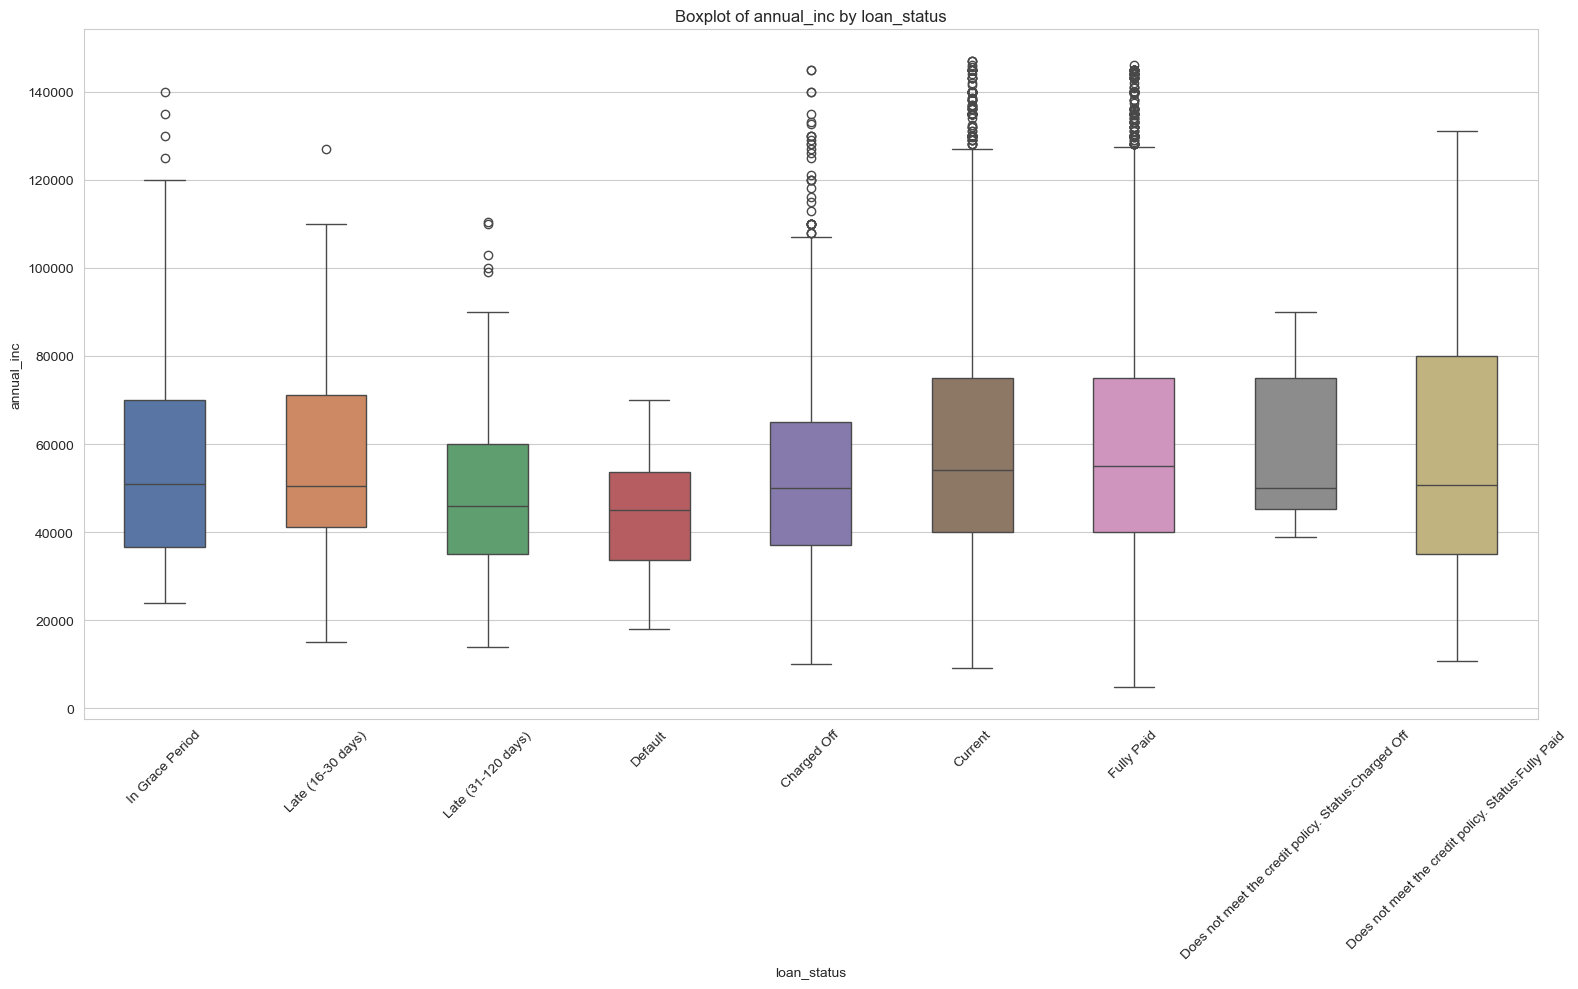

In [277]:
plotter = Plotter(df_fin)

loan_status_order = [
        "In Grace Period",
        "Late (16-30 days)",
        "Late (31-120 days)",
        "Default",
        "Charged Off",
        "Current",
        "Fully Paid",
        "Does not meet the credit policy. Status:Charged Off",
        "Does not meet the credit policy. Status:Fully Paid"
    ] # list created, so can I order the categories of loan_status in more clear way for boxplot visualization. 

plotter.boxplot("loan_status", "annual_inc", figsize=(16,10), palette="deep", order=loan_status_order)



*above* Here, you can see a boxplot of loan_status. From here we can draw a few shallow insights. We can see that the medians
in all the unpaid cateogories (both lates, default and charged off) are less generally less than current, and fully paid. 
We can see that the boxes or group of the data are smaller, in all unpaid, meaning the data is more centrally grouped, than in the current and fully paid loans. The total range of incomes is also smaller in these groups than in current and fully paid. These trends are more pronounced in on late (31-120) and default. We can also see that when the data is split this way, i.e loan_status by category,
there are outliers, with the vast majority, in current, fully paid and charged off. The data is bias towards there only be postive outliers as it income data, starting from 0, with no negatives.

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette,


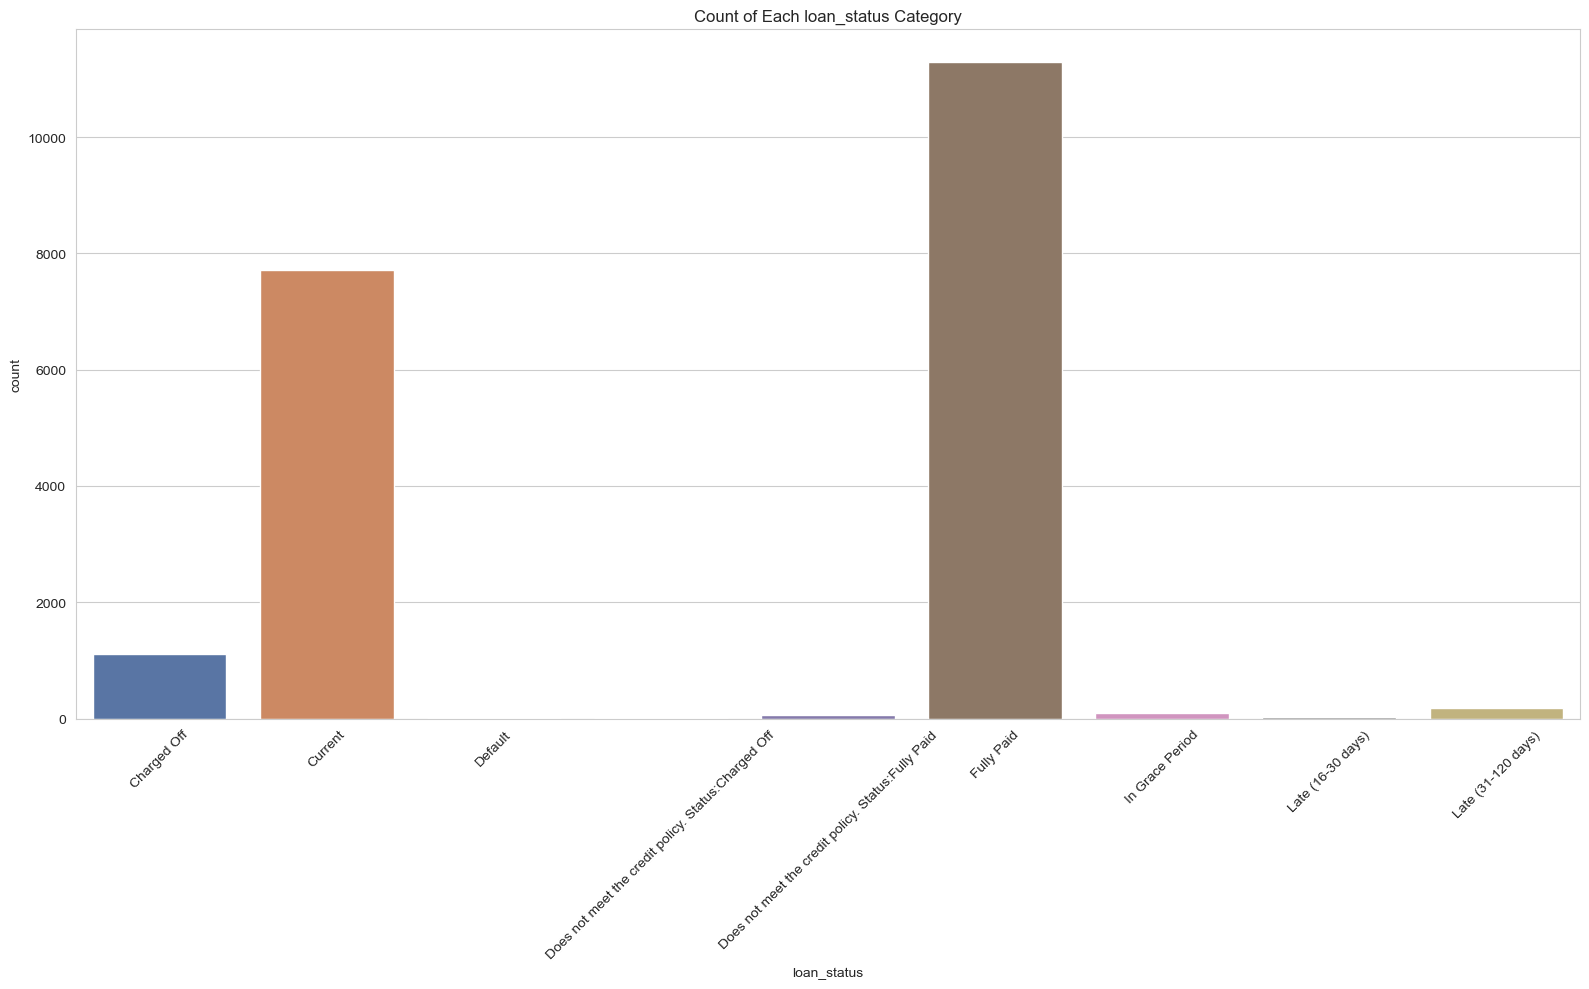

In [276]:

loan_status_counts = df_fin["loan_status"].value_counts().reset_index()
# above, works out the counts for each loan_status category then adds an index. 

loan_status_counts.columns = ["loan_status", "count"]
"""
above, as the index was reset, loan_status will be the index and the count
col will be labelled as index. This renames them properly.
"""

plotter = Plotter(loan_status_counts)

plotter.barplot(x="loan_status", y="count", title="Count of Each loan_status Category",figsize=(16, 10),
                palette="deep") # create barplot.



*above* Here is a barplot of the total counts of each loan_status category, which can help compliment out boxplot, for deeper visual insights. As we can see, current and fully paid loans, make up the vast majority of cases, with charged off distance third. This would go to explain someway why those three categories have the most outliers statistically. Some futher analysis could be done between them and charged off to see if one category is more or less likely to have an average amount outliers for its size in the context of the data, although I think this is unesscary for this task. The sheer size of the current and fully paid categories also help to explain why there data range is the biggest. The barplot also shows how small the rest of the categories are in comparsion. This leads to draw the conclusion that the medians of both current and fully paid, will be closer to the median of the total dataset, and even a small varation from this visually in the smaller categories, could be statistically significant, due the strength of the size of these numbers, and the standard dev.

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


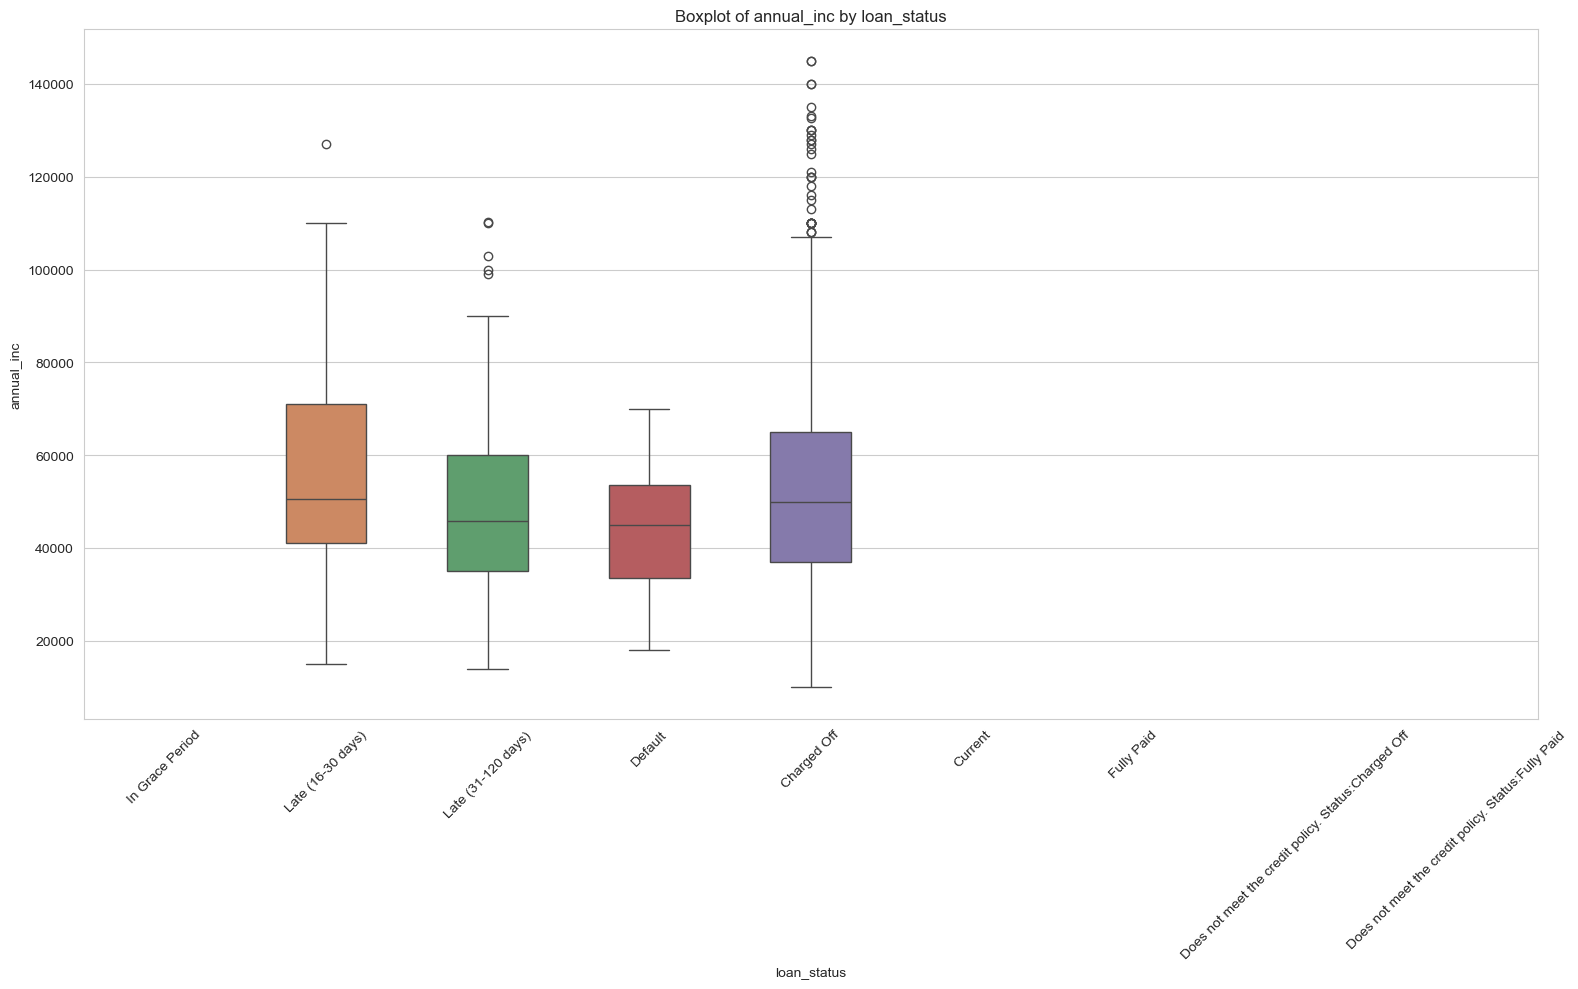

In [272]:
plotter_all_unpaid = Plotter(df_all_unpaid)

plotter_all_unpaid.boxplot("loan_status", "annual_inc", figsize=(16,10), palette="deep", order=loan_status_order)

*above* Here is the same boxplot again, but using a df where only the unpaid loan cateogries i.e. both lates, default and charged off, are shown for easier visaulization. As these are the ones we will be comparing for this task. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:68: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True,


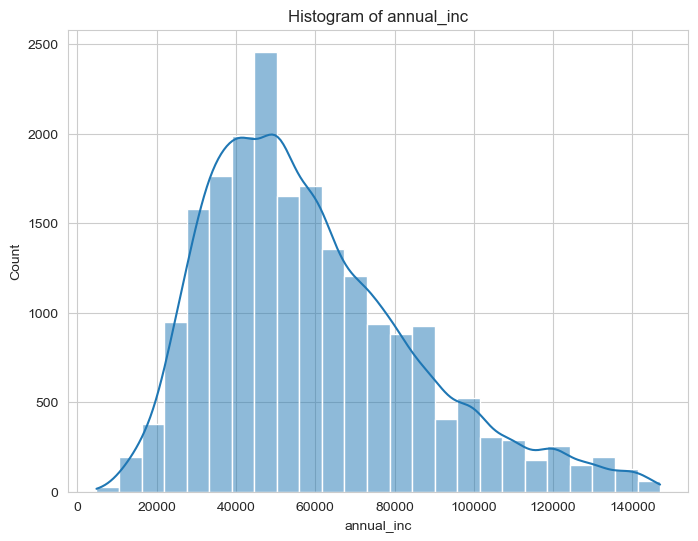

In [278]:
plotter.histogram("annual_inc")

*above* Here we have plotted histogram to visualize the distribution of the annual_inc data we are testing.
As we can see there is a fair amount postive skew. Witht the data grouped around lower end of the income scale, and lower amount of really high earners. From what I have read this is pretty typical of income data. 

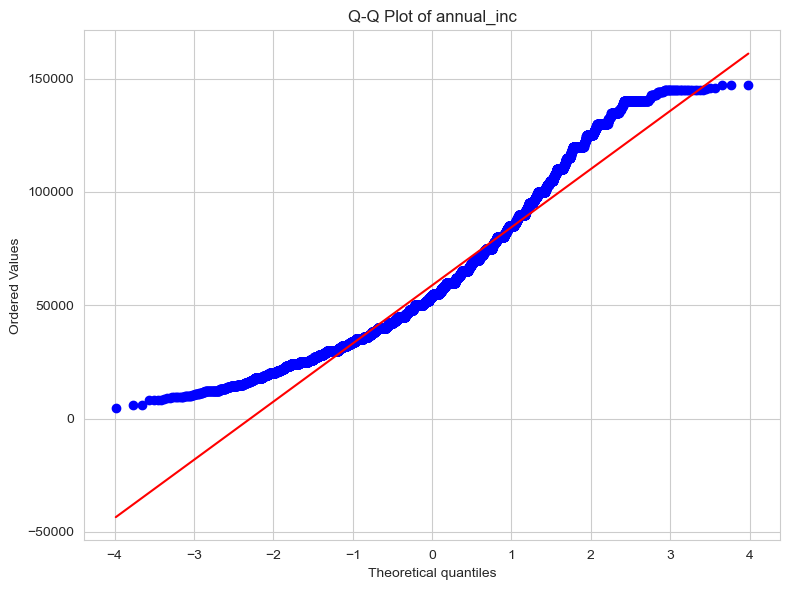

In [279]:
plotter.qqplot("annual_inc")

*above* Here I have a Q-Q plot, of the same data, as another way to visualize the same distribution. We can see vs a theorectical
standard distribution vs out annual_inc data distribution. As is shown by the histogram, here we can see that the lower end of the income, peaking at around 25K does not fit the standard distribution line and indeed has a higher distribution. Normalizes around the middle and then has a lower actual distribution around the top of the income bracket vs the standard line of dist. 

In [280]:


df_fin_na = df_fin[df_fin["loan_status"].notna() & df_fin["annual_inc"].notna()]
# above, even though Null values were removed was still getting null related issues for the test, so removed them again to be suew 


kw_groups = [df_fin_na [df_fin_na ["loan_status"] == category]["annual_inc"].values \
             for category in df_fin_na ["loan_status"].unique()]
# Kruskal-Wallis test used, testing all the unique categories in loan_status medians against annual_inc. 

h_stat, p_value = kruskal(*kw_groups)

print("Kruskal-Wallis Test Results:")
print(f"H-Statistic: {h_stat:.3f}")
print(f"P-Value: {p_value:.3e}")


Kruskal-Wallis Test Results:
H-Statistic: 65.759
P-Value: 3.416e-11


*above* looking at the distrubition of data in the histogram and in the Q-Q plot, it is eveident it is skewed and not normal with some 
ouliers. Thus using a statistical tests that compare the mean ( ANOVA, T-test etc.) may lead to unrealible results. Thus is more appropiate to use tests, that are non-parmetric and use the median. So it was decided to use, the Kruskal-Wallis and Mann-Whitney tests that both are non-parametric and use comparison of the median. as well as comparing categories to continous data which is what we have in this case.

Here a Kruskal-Wallis (KW) test is used to determine difference in medians, as there are 3 or more categories, and show if there is any significance in differnce in annual_inc between the categories. we can see from the results that the chance of getting this H-statistic randomly, is waaay below the 0.05 alpha. This the diffence in median income between all the categories in is significant, and further analysis worth exploring. 

In [281]:
df_fin_copy = df_fin_na.copy()  # copy of the df to modify. 

df_fin_copy["loan_status_grouped_char"] = df_fin_copy["loan_status"].apply(
    lambda x: "Charged Off" if x == "Charged Off" else "Other") 
# above, lambda function to to create a new column, of loan_status, with just charged off and other. 

charged_off_loans = df_fin_copy[df_fin_copy["loan_status_grouped_char"] == "Charged Off"]["annual_inc"].dropna() # make sure no nulls. 
not_charged_off_loans = df_fin_copy[df_fin_copy["loan_status_grouped_char"] == "Other"]["annual_inc"].dropna()


u_stat, p_value = mannwhitneyu(charged_off_loans, not_charged_off_loans, alternative="two-sided")
#above, Mann-Whitney test.


print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")
# above, results. 

Mann-Whitney U Test Results:
U-Statistic: 9744444.5
P-Value: 1.5027800046652857e-08


*above* Here I create a copy of the df that I modify, and then create a new col of loan_status, resorting the categories
into 2: 'charged off', and then everything else into 'other'. this allows me to perform a Mann-Whitney test (MW) which requires just 
2 categories, and tests their continous varible medians against each other. As I know from the KW test the loan_status has a statistically sig effect on the annual_inc. I am no attempting to determine if one or more of my unpaid, categories fall into this.
by creating a df, with just the category I want to test vs the rest of the data I can isolate and determine if this has signfigance. 
Lookin at the P-value, charged off does indeed show significance. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


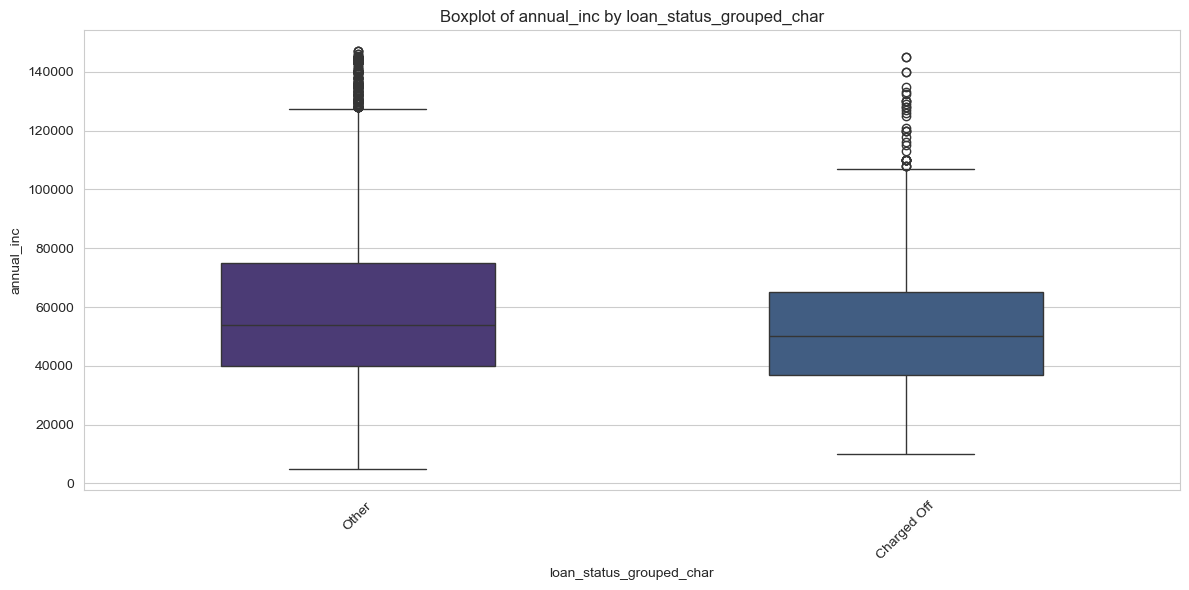

In [282]:
plotter_mw = Plotter(df_fin_copy)

plotter_mw.boxplot("loan_status_grouped_char", "annual_inc")

*above* boxplot, just to visualize the difference between categories, their means range etc. We cn see here, that the medians look rather close, but as the WH test shows, the difference between them shows significance demonstrating that due to the size and structure of the data, even a small diviation from the main median, can be signifcant. 

In [283]:
df_fin_copy["loan_status_grouped_all_late_default"] = df_fin_copy["loan_status"].apply(
    lambda x: "All Late & Default" if x in ["Late (16-30 days)", "Late (31-120 days)", "Default"] else "Other"
)

all_late_default_loans = df_fin_copy[df_fin_copy["loan_status_grouped_all_late_default"] == "All Late & Default"]["annual_inc"].dropna()
not_all_late_default_loans = df_fin_copy[df_fin_copy["loan_status_grouped_all_late_default"] == "Other"]["annual_inc"].dropna()


u_stat, p_value = mannwhitneyu(all_late_default_loans, not_all_late_default_loans, alternative="two-sided")


print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")

Mann-Whitney U Test Results:
U-Statistic: 1788883.0
P-Value: 1.3894437018123548e-07


*above* Same as before but for both of the late cateogories. As we can see here together annual_inc median is statatistically significantly (ss) different for for late payments vs other categories. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


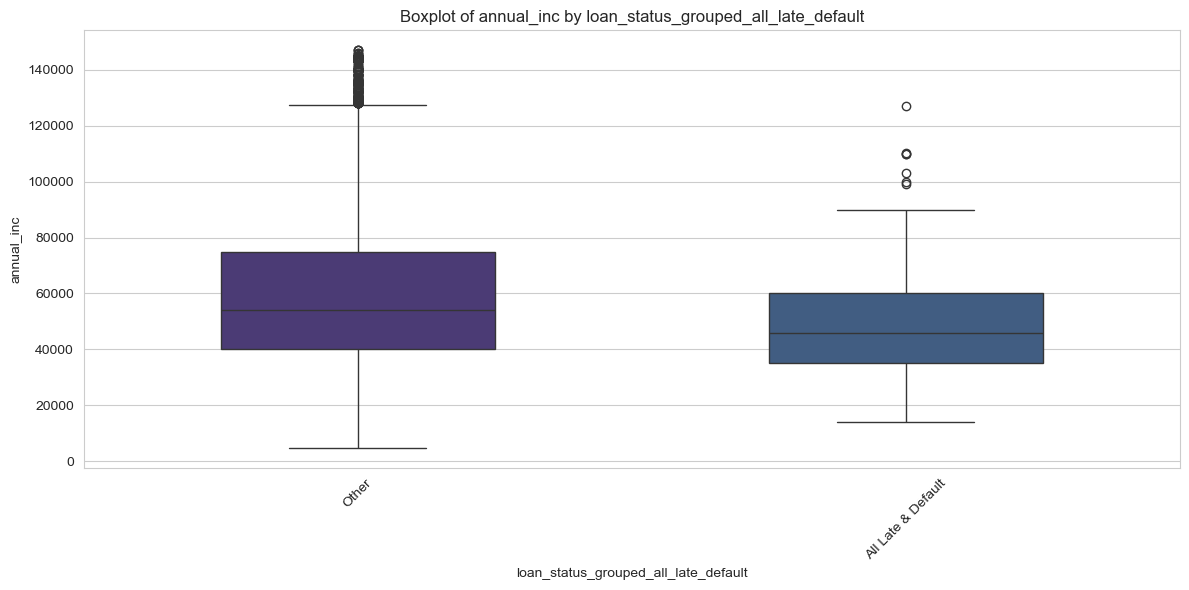

In [284]:
plotter_mw.boxplot("loan_status_grouped_all_late_default", "annual_inc") # boxplot again to visualize. 

In [285]:
df_fin_copy["loan_status_grouped_early_late"] = df_fin_copy["loan_status"].apply(
    lambda x: "Late (16-30 days)" if x == "Late (16-30 days)" else "Other"
)

early_late_loans = df_fin_copy[df_fin_copy["loan_status_grouped_early_late"] == "Late (16-30 days)"]["annual_inc"].dropna()
not_early_late_loans = df_fin_copy[df_fin_copy["loan_status_grouped_early_late"] == "Other"]["annual_inc"].dropna()


u_stat, p_value = mannwhitneyu(early_late_loans, not_early_late_loans, alternative="two-sided")


print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")

Mann-Whitney U Test Results:
U-Statistic: 247484.0
P-Value: 0.536152750423452


*above* Here have broken up the late payments, into their seperate columns and am trying the late (16-30 days) or 'early late' payments
vs all other loan_status as one. Here we can see that in fact there isn't actually a ss differnce, and thus being early late, doesn't ss change the annual_inc median. 

In [286]:
df_fin_copy["loan_status_grouped_default"] = df_fin_copy["loan_status"].apply(
    lambda x: "Default" if x == "Default" else "Other")

default_loans = df_fin_copy[df_fin_copy["loan_status_grouped_default"] == "Default"]["annual_inc"].dropna()
not_default_loans = df_fin_copy[df_fin_copy["loan_status_grouped_default"] == "Other"]["annual_inc"].dropna()


u_stat, p_value = mannwhitneyu(default_loans, not_default_loans, alternative="two-sided")


print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")

Mann-Whitney U Test Results:
U-Statistic: 108440.0
P-Value: 0.019155761203744227


*above* here we are doing the the same as before but using default. As we can see there is ss diffence, but it is only just 
under the 0.05 alpha. 

In [287]:

default_count = df_fin_copy["loan_status"].value_counts().get("Default")

total_count = df_fin_copy["loan_status"].count()

print(f"Count of 'Default': {default_count}")
print(f"Total count in 'loan_status': {total_count}")


Count of 'Default': 16
Total count in 'loan_status': 20498


*above* to futher put 'Default' into context, here we can see that it has incredible low sample size, of 16 out of total 0f 20498
results. this is 0.00079 (2sf) of the total count of loan_status and I think makes insights deduced from this unrealible. 

In [288]:
df_fin_copy["loan_status_grouped_late_late"] = df_fin_copy["loan_status"].apply(
    lambda x: "Late (31-120 days)" if x == "Late (31-120 days)" else "Other")

late_late_loans = df_fin_copy[df_fin_copy["loan_status_grouped_late_late"] == "Late (31-120 days)"]["annual_inc"].dropna()
not_late_late_loans = df_fin_copy[df_fin_copy["loan_status_grouped_late_late"] == "Other"]["annual_inc"].dropna()


u_stat, p_value = mannwhitneyu(late_late_loans, not_late_late_loans, alternative="two-sided")


print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")

Mann-Whitney U Test Results:
U-Statistic: 1440935.0
P-Value: 9.313432702923506e-07


*above* Here the other late - late (31-120 days) or late late, is analysed vs others. We can see that unlike early late, there
is quite a large ss diffence here. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


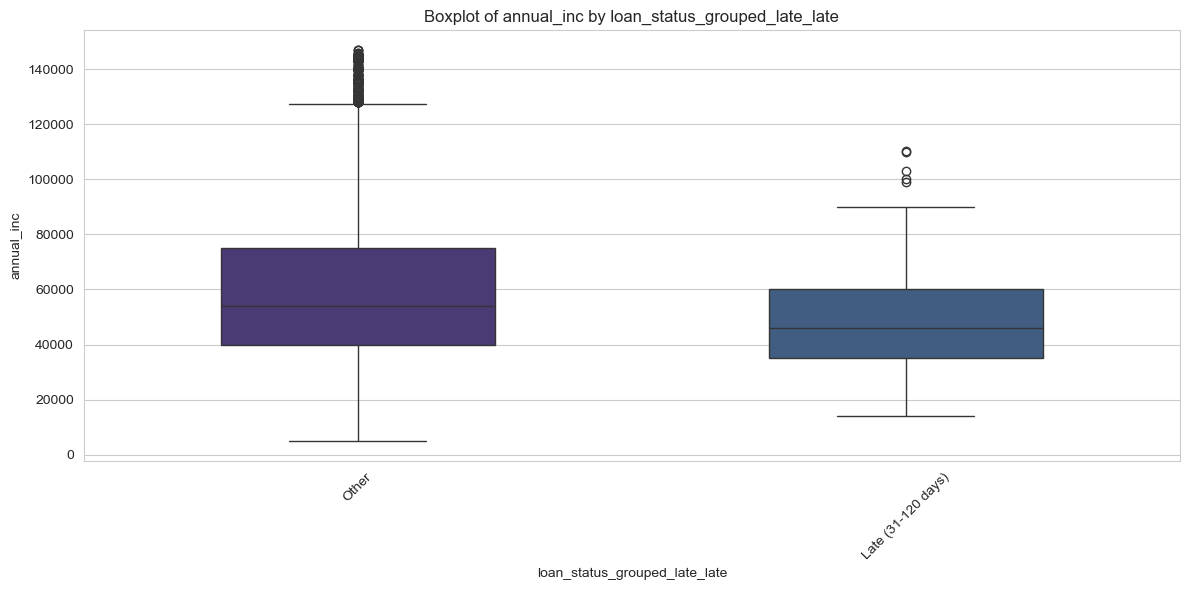

In [289]:
plotter_mw.boxplot("loan_status_grouped_late_late", "annual_inc") # boxplot to visualize. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


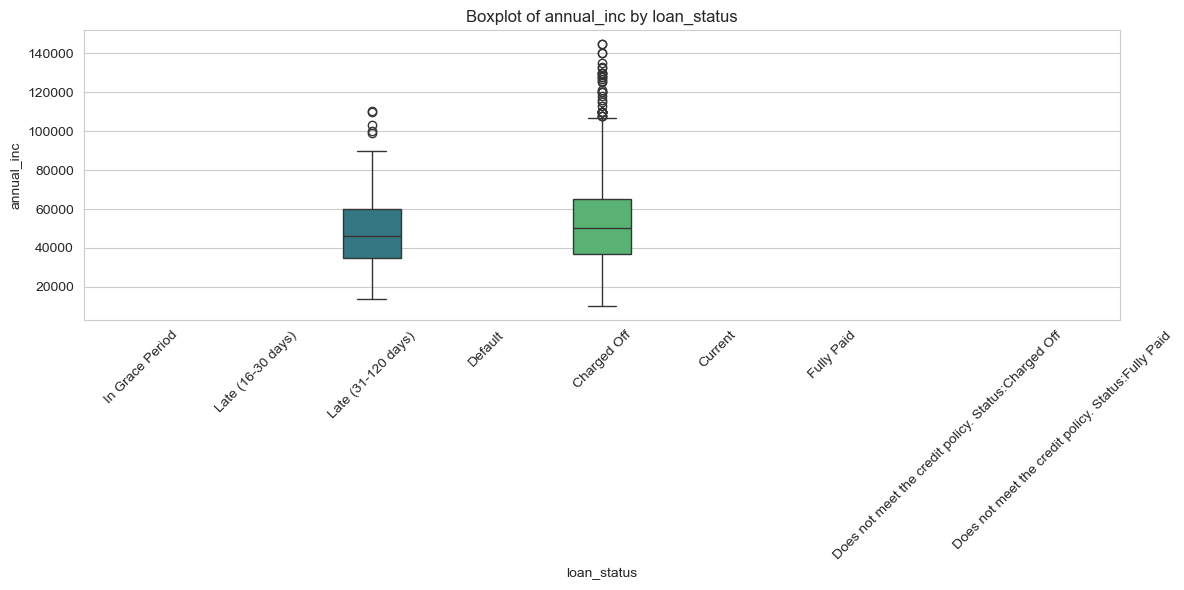

In [290]:

plotter_late_late_char = Plotter(df_late_late_charged_off)

plotter_late_late_char.boxplot("loan_status" , "annual_inc", order=loan_status_order)

*above* Here I've is boxplot of the two categories in unpaid, that were realible and had a ss in medians from the other categories in annual_inc. late (31-120 days) and charged off. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/2460104523.py:85: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


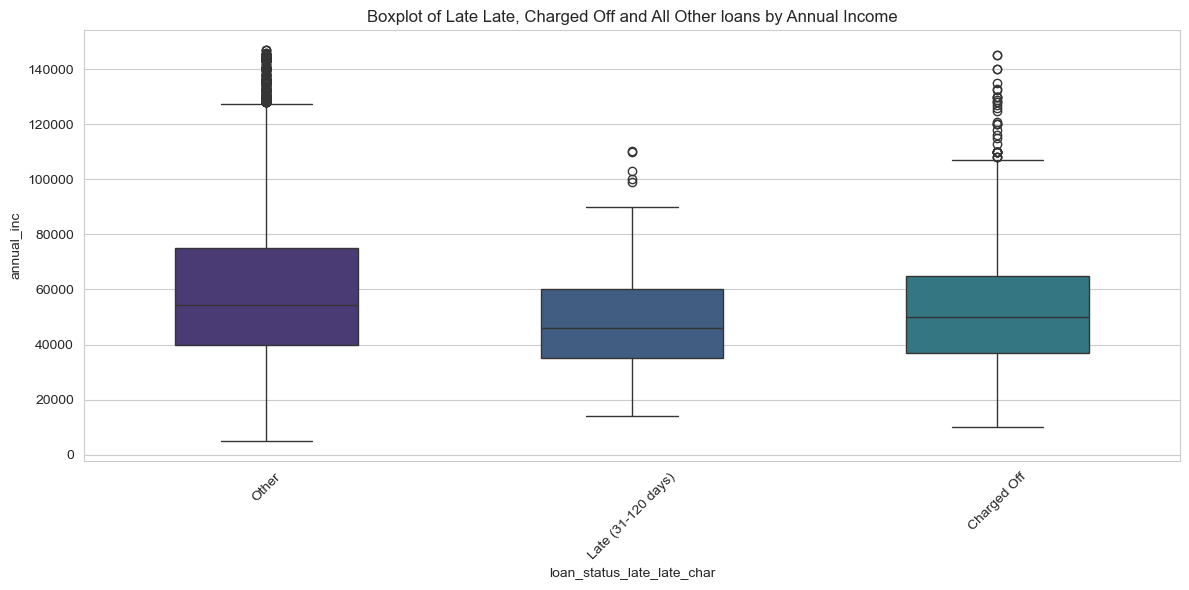

In [291]:
def late_late_char_ls(status):
    if status == "Late (31-120 days)":
        return "Late (31-120 days)"
    elif status == "Charged Off":
        return "Charged Off"
    else:
        return "Other"

df_fin_copy["loan_status_late_late_char"] = df_fin_copy["loan_status"].apply(late_late_char_ls)

plotter_mw.boxplot("loan_status_late_late_char", "annual_inc",
                   title="Boxplot of Late Late, Charged Off and All Other loans by Annual Income")

*above* here is another boxplot to visualize the median and ranges differnces between the two ss categories and all other cats.
And we can see the median line in both is less. Although from a boxplot it is hard to tell exactly how much by but I would say at least a few thousand. And the the range of incomes is a lot less in both 'Late (31-120 days)' and 'Charged Off' than 'Other', specifically around te higher income mark. showing there are less high earners in both of these categories, than overall. 

In [ ]:
dunn_results = sp.posthoc_dunn( 
    df_fin_copy, 
    val_col="annual_inc",  
    group_col="loan_status_late_late_char", 
    p_adjust="bonferroni"  
) # Dunn's test to test the ss of the difference in median between the 3 groups. 

print("Dunn's Test: Pairwise Comparison on loan_status Results")
dunn_results


Dunn's Test: Pairwise Comparison on loan_status Results


,Charged Off,Late (31-120 days),Other
Charged Off,1.000000e+00,0.039100,2.327526e-08
Late (31-120 days),3.909979e-02,1.000000,1.434351e-06
Other,2.327526e-08,0.000001,1.000000e+00


*above* Ae we now have the loan_status groups split into 3 groups of late late, charged off and other, it would help to gain futher
insight to compare them to each other seperately specfically looking to see the if 'Late (31-120 days)' and 'Charged Off' differ.
As we can see both late late and charged off medians ss differ from the other categories, which helps to confirm and validate the HW
tests previously done. However they also ss differ from each other, but are only just under the 0.05 alpha, and a lot less by orders of magnitude than both by 'Other'. 

This could possibly suggest that while annual income averagly tends to be different for both loans that are charged off, and late late, but is also similar and lower, than average income in all other brackets. It also possibly suggest that the lower your income the more likely you are to be late late, with your payments, and the more likley you are to be charged off. However the if your income is lower you are more likely just to be late late than charged off, even if this link is borderline ss. 

In [243]:
df_fin_copy["loan_status_grouped_all_unpaid"] = df_fin_copy["loan_status"].apply(
    lambda x: "All Unpaid" if x in ["Late (16-30 days)", "Late (31-120 days)", "Default", "Charged Off"] else "Other"
)

all_unpaid_loans = df_fin_copy[df_fin_copy["loan_status_grouped_all_unpaid"] == "All Unpaid"]["annual_inc"].dropna()
not_all_unapid_loans = df_fin_copy[df_fin_copy["loan_status_grouped_all_unpaid"] == "Other"]["annual_inc"].dropna()


u_stat, p_value = mannwhitneyu(all_unpaid_loans, not_all_unapid_loans, alternative="two-sided")


print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")

Mann-Whitney U Test Results:
U-Statistic: 11285131.5
P-Value: 1.2989298758089535e-13


*above* Here is MW for all the unpaid categories vs others and as you can see, you are very ss likely to have a different median income than all other categories than if your loan_status is one of these unpaid. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/521888215.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_40029/521888215.py:84: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


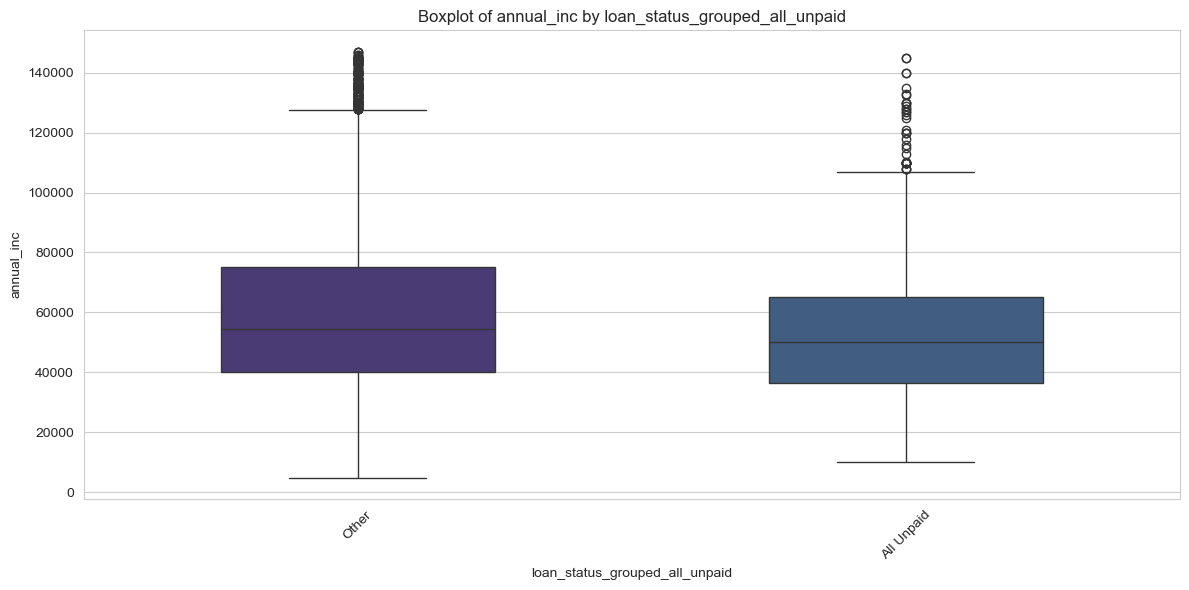

In [245]:
plotter_mw.boxplot("loan_status_grouped_all_unpaid", "annual_inc") # boxplot visualzing all paid vs all others. 

Summary conclusion: 

So using all this data and the insights we have gleaned. We can summize that firstly, there is a ss differnce in the median annual_inc between all unapid loan status' and all other brackets. Breaking this down futher, we see that both loan_status being 'Late (31-120 days)'
& 'Charged Off' both a ss difference (lower) in annual_inc than all other categories. When we compare them there is a ss difference but it is on threshold of the 0.05 alpha. all this seems to suggest on the surface that annual_inc may be able to be used as possible indicator to see how likely the loan is likely to be 'Charged Off' or 'Late (31-120 days)'. However it is unclear how many of these 'Late (31-120 days)' loans eventually get changed to 'Charged Off' down the line. and if annual_inc can be used an indicator to see if a 'Late (31-120 days)' loan will become 'Charged Off'. It also possibly suggests that lower your income annual_inc is the more likely are you to have a 'Late (31-120 days)' payment rather than be 'Charged Off' as P-value was lower as was the median income for 'Late (31-120 days)'. The data also shows that there is no ss diff of 'Late (16-30 days)' than the other categories, and 'Default' loans have too little data points to draw any respectable conclusions from.

For futher Study on this column, it would be great to get data after a timeperiod, say a year and look too see what loan_status cat the 'Late (31-120 days)' had changed to - 'Charged off' "Current' etc. And then do some anaylsis to see if annuanl income has correlation on what these Loans loan_status becomes. This could also applied to 'Late (16-30 days)' becoming 'Late (30-120 days)'. This could then be used to see if if there was a correlation between annual_inc and late loans developing, and eventually becoming charged. This could be combined with analysis of other columnns, and column changes in correlation between late and charged off loans. And overall combined with other analyses, such of that of grade, to help paint a picture of what factors are likely to affect risk to loan revenue. 